In [1]:
# MNIST – (сокращение от «Modified National Institute of Standards and Technology»)
# – база данных образцов рукописного написания цифр
import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.datasets import mnist

# загуржаю данные этой библиотеки
# Здесь 60 000 изображений в обучающей выборке и 10 000 – в тестовой. Мы будем использовать определения:
# x_train – изображения цифр обучающей выборки;
# y_train – вектор соответствующих значений цифр (например, если на i-м изображении нарисована 5, то  y_train[i] = 5);
# x_test – изображения цифр тестовой выборки;
# y_test – вектор соответствующих значений цифр для тестовой выборки.
# Каждое изображение имеет размер 28х28 пикселей и представлено в градациях серого
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Теперь нужно ответить на второй вопрос о структуре сети. Строгого ответа на него нет,
# т.к. структура выбирается самим разработчиком исходя из его представлений о решении этой задачи.
# Общий ориентир здесь такой: для распознавания графических образов хорошо себя показали сверточные НС.
# Но мы о них пока еще ничего не знаем, поэтому воспользуемся обычной полносвязной НС с
#
# 28 x 28 = 784 входами;
# 128 нейронами скрытого слоя;
# 10 нейронами выходного слоя.
# В качестве функций активации скрытого слоя выберем популярную на сегодняшний день ReLu, а у выходных нейронов –
# softmax, т.к. мы хотим интерпретировать выходные значения в терминах вероятности принадлежности к тому или иному
# классу цифр.
# Первый слой должен преобразовывать изображение 28x28 пикселей в вектор из 784 элементов.
# Для такой операции в Keras можно создать слой специального вида – Flatten
# Следующий слой создадим с помощью уже известного нам класса Dense, который свяжет все 784 входа со всеми 128
# нейронами. И такой же последний слой из 10 нейронов, который будет связан со всеми 128 нейронами предыдущего слоя.
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# вывод структуры в консоль
#print(model.summary())

# Необходимо входные значения вектора x стандартизировать так, чтобы они находились в диапазоне от 0 до 1
# Здесь каждое значение тензоров x_train и x_test будет делиться на максимальное число 255, которое они могут принимать.
# На выходе получим вещественные величины от 0 до 1.
x_train = x_train / 255
x_test = x_test / 255

# Еще нам нужно подготовить правильный формат выходных значений
# нам нужен вектор с 1 на месте соответствующего числа, т.к. наша НС имеет 10 выходов, и каждый выход будет
# соответствовать определенной цифре: от 0 до 9.
# В Keras уже имеется функция, которая все это делает.
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Теперь выберем функцию потерь (loss function) и способ оптимизации градиентного алгоритма.
# Лучше всего начинать с категориальной кросс-энтропии:
#
# categorical_crossentropy
#
# и активационной функции выходных нейронов softmax. Функцию активации мы уже такую прописали,
# осталось указать этот критерий качества:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# запуск модели обучения
model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)
# batch_size = 32 – это размер батча (32 картинки), после которых будет выполняться корректировка весов
# validation_split = 0,2 – разбиение обучающей выборки на собственно обучающую и проверочную. Значение 0,2 определяет,
# что для каждой эпохи 20% случайных картинок из обучающей
# выборки будут помещаться в выборку валидации. 20% - это довольно частое значение для создания проверочной выборки
# (ее, как правило, выбирают из диапазона от 10% до 30%).

# Проверка работы сети на тестовом множестве:
model.evaluate(x_test, y_test_cat)
# Метод evaluate прогоняет все тестовое множество и вычисляет значение критерия качества и метрики.

# выполним распознавания какого-либо тестового изображения:
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)

2022-10-17 11:34:14.195827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 11:34:23.963546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2522 - accuracy: 0.9271 - val_loss: 0.1314 - val_accuracy: 0.9615
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1036 - accuracy: 0.9696 - val_loss: 0.1029 - val_accuracy: 0.9684
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0675 - accuracy: 0.9797 - val_loss: 0.0813 - val_accuracy: 0.9759
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0830 - val_accuracy: 0.9758
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0343 - accuracy: 0.9898 - val_loss: 0.0867 - val_accuracy: 0.9755
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0802 - val_accuracy: 0.9771
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0845 - val_accuracy:

In [2]:
# И полагаем, что максимальное значение как раз и будет соответствовать нужному классу. В данном случае – это число
# 9.9881822e-01 третьего выхода, то есть, для цифры 2. Чтобы было проще воспринимать выходную информацию, будем выводить
# номер максимального числа из этого вектора. Для этого воспользуемся довольно удобной функцией argmax модуля numpy:
print(np.argmax(res))

2


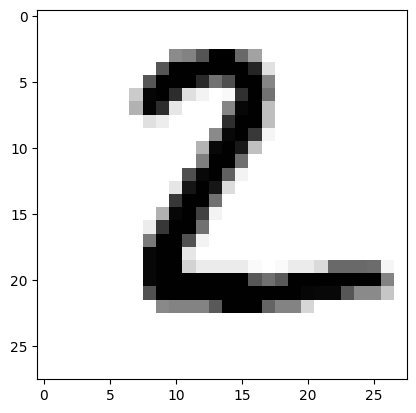

In [3]:
# И, еще, отобразить на экране это тестовое изображение:
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [4]:
# Давайте теперь выделим и посмотрим на неверные результаты распознавания.
# Пропустим через НС всю тестовую выборку и векторы выходных значений преобразуем в числа от 0 до 9:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [5]:
# Затем, сформируем маску, которая будет содержать True для верных вариантов и False – для неверных.
# И с помощью этой маски выделим из тестовой выборки все неверные результаты:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = y_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(196, 28, 28)


Значение сети; 7


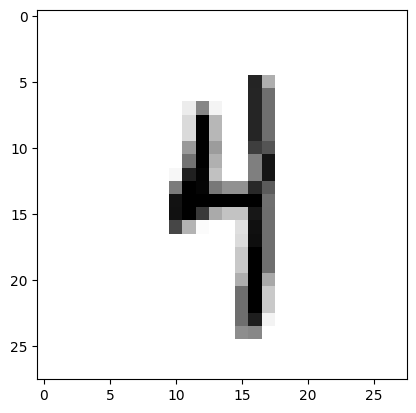

Значение сети; 2


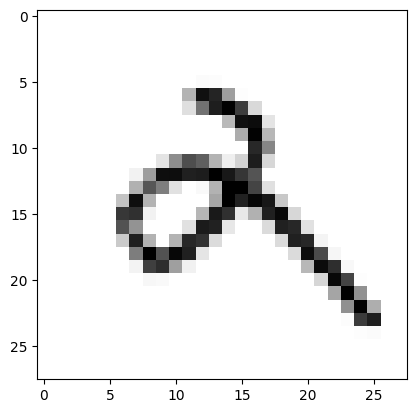

Значение сети; 1


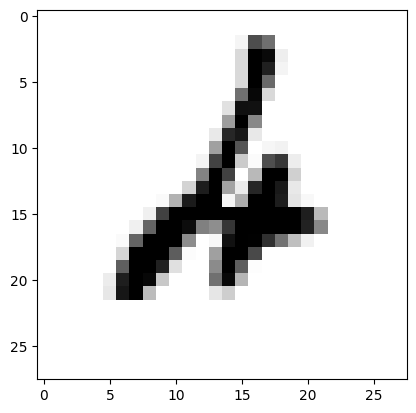

Значение сети; 0


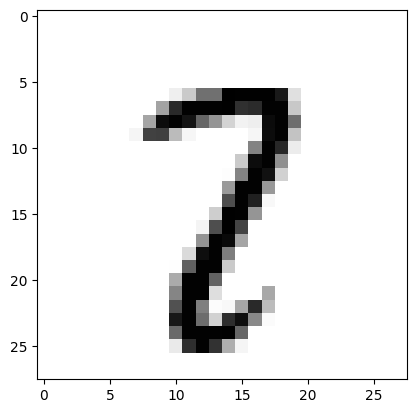

Значение сети; 4


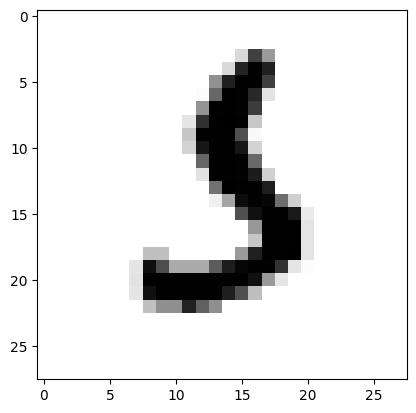

In [6]:
# И выведем первые 5 из них на экран:

for i in range(5):
    print(f'Значение сети; {y_test[i]}')
    plt.imshow(x_false[i], cmap = plt.cm.binary)
    plt.show()

In [ ]:
# а теперь попробовать бы свои каракули распознать